In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from math import sqrt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [74]:
#preprocessing
data_orig = pd.read_csv('OnlineNewsPopularity.csv', sep=', ')
data_orig = data_orig.dropna()

#remove awful outlier 31038
data_orig.drop(31038, axis=0, inplace=True)

columns = list(data_orig)
bestindex = [7, 18, 24, 26, 27, 28, 29, 30, 41, 42]
bestcol = [columns[i] for i in bestindex]

data = data_orig[bestcol].to_numpy()

samples = data
classes = data_orig["shares"].to_numpy()

samples = np.asarray(samples).astype(np.float32)
classes = np.asarray(classes).astype(np.float32)

X_train_full, X_test, y_train_full, y_test = train_test_split(samples, classes)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [75]:
#train
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="sigmoid", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
697/697 [==============================] - 1s 1ms/step - loss: 119395704.0000 - val_loss: 177032960.0000
Epoch 2/50
697/697 [==============================] - 0s 578us/step - loss: 118844456.0000 - val_loss: 176638432.0000
Epoch 3/50
697/697 [==============================] - 0s 598us/step - loss: 118481984.0000 - val_loss: 176866160.0000
Epoch 4/50
697/697 [==============================] - 0s 603us/step - loss: 118531936.0000 - val_loss: 176820112.0000
Epoch 5/50
697/697 [==============================] - 0s 578us/step - loss: 118681528.0000 - val_loss: 176632144.0000
Epoch 6/50
697/697 [==============================] - 0s 563us/step - loss: 118467576.0000 - val_loss: 176531744.0000
Epoch 7/50
697/697 [==============================] - 0s 574us/step - loss: 118553392.0000 - val_loss: 176529472.0000
Epoch 8/50
697/697 [==============================] - 0s 553us/step - loss: 118653808.0000 - val_loss: 176245968.0000
Epoch 9/50
697/697 [==============================] - 0s 5

In [76]:
#validate
mse_test = model.evaluate(X_valid, y_valid)

233/233 [==============================] - 0s 433us/step - loss: 176549904.0000


In [77]:
#test
y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred))

0.021474943539470104


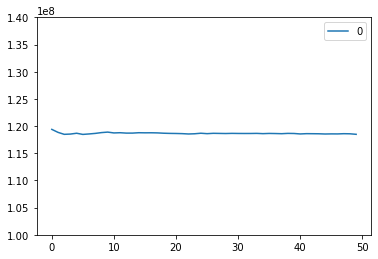

In [81]:
plt.ylim(1e8, 1.4e8)
sns.lineplot(data=pd.DataFrame(history.history['loss']))

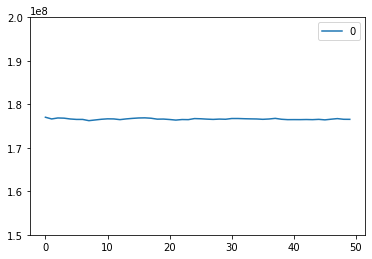

In [85]:
plt.ylim(0, 2e8)
sns.lineplot(data=pd.DataFrame(history.history['val_loss']))

In [98]:
best_six_indeces = [26, 27, 28, 30, 41, 42]
best_six_columns = [columns[i] for i in best_six_indeces]

data = data_orig[best_six_columns].to_numpy()
samples = data

samples = np.asarray(samples).astype(np.float32)
classes = np.asarray(classes).astype(np.float32)

X_train_full, X_test, y_train_full, y_test = train_test_split(samples, classes)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [99]:
#train
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="sigmoid", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
697/697 [==============================] - 1s 725us/step - loss: 168430976.0000 - val_loss: 125175696.0000
Epoch 2/50
697/697 [==============================] - 0s 590us/step - loss: 167824320.0000 - val_loss: 125234184.0000
Epoch 3/50
697/697 [==============================] - 0s 556us/step - loss: 167881424.0000 - val_loss: 125207016.0000
Epoch 4/50
697/697 [==============================] - 0s 540us/step - loss: 167825136.0000 - val_loss: 124978080.0000
Epoch 5/50
697/697 [==============================] - 0s 564us/step - loss: 167661568.0000 - val_loss: 125283016.0000
Epoch 6/50
697/697 [==============================] - 0s 571us/step - loss: 167990624.0000 - val_loss: 125249360.0000
Epoch 7/50
697/697 [==============================] - 0s 540us/step - loss: 167798416.0000 - val_loss: 125248096.0000
Epoch 8/50
697/697 [==============================] - 0s 561us/step - loss: 167688128.0000 - val_loss: 125000240.0000
Epoch 9/50
697/697 [==============================] - 0s

In [100]:
#validate
mse_test = model.evaluate(X_valid, y_valid)

233/233 [==============================] - 0s 369us/step - loss: 125217504.0000


In [101]:
#test
y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred))

0.013803156729992772


In [21]:
best_twenty_indeces = [7,9,10,11,18,20,21,24,25,26,27,28,29,30,41,42,44,53,56,59]
best_twenty_columns = [columns[i] for i in best_twenty_indeces]

data = data_orig[best_twenty_columns].to_numpy()
samples = data

samples = np.asarray(samples).astype(np.float32)
classes = np.asarray(classes).astype(np.float32)

X_train_full, X_test, y_train_full, y_test = train_test_split(samples, classes)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [22]:
#train
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="sigmoid", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
697/697 [==============================] - 1s 815us/step - loss: 169223088.0000 - val_loss: 121499440.0000
Epoch 2/50
697/697 [==============================] - 1s 744us/step - loss: 168792768.0000 - val_loss: 121764360.0000
Epoch 3/50
697/697 [==============================] - 0s 638us/step - loss: 168527376.0000 - val_loss: 121947840.0000
Epoch 4/50
697/697 [==============================] - 0s 631us/step - loss: 168553504.0000 - val_loss: 121819592.0000
Epoch 5/50
697/697 [==============================] - 0s 630us/step - loss: 168670656.0000 - val_loss: 122001288.0000
Epoch 6/50
697/697 [==============================] - 0s 675us/step - loss: 168610176.0000 - val_loss: 121733696.0000
Epoch 7/50
697/697 [==============================] - 0s 672us/step - loss: 168457920.0000 - val_loss: 121580744.0000
Epoch 8/50
697/697 [==============================] - 0s 638us/step - loss: 168492928.0000 - val_loss: 121591320.0000
Epoch 9/50
697/697 [==============================] - 0s

In [23]:
#validate
mse_test = model.evaluate(X_valid, y_valid)

233/233 [==============================] - 0s 414us/step - loss: 121311760.0000


In [24]:
#test
y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred))

0.024490553983026464


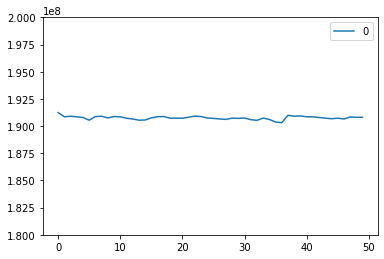

In [63]:
plt.ylim(1.8e8, 2e8)
sns.lineplot(data=pd.DataFrame(history.history['loss']))

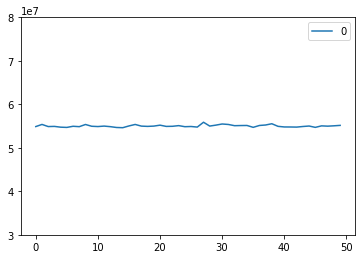

In [68]:
plt.ylim(0.3e8, 0.8e8)
sns.lineplot(data=pd.DataFrame(history.history['val_loss']))

In [111]:
data = data_orig.to_numpy()
samples = data[:, 2:60]

samples = np.asarray(samples).astype(np.float32)
classes = np.asarray(classes).astype(np.float32)

X_train_full, X_test, y_train_full, y_test = train_test_split(samples, classes)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [112]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="sigmoid", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
697/697 [==============================] - 0s 676us/step - loss: 179726160.0000 - val_loss: 91378272.0000
Epoch 2/50
697/697 [==============================] - 0s 570us/step - loss: 178680432.0000 - val_loss: 91374016.0000
Epoch 3/50
697/697 [==============================] - 0s 543us/step - loss: 178625232.0000 - val_loss: 90960960.0000
Epoch 4/50
697/697 [==============================] - 0s 550us/step - loss: 178703120.0000 - val_loss: 90937320.0000
Epoch 5/50
697/697 [==============================] - 0s 548us/step - loss: 178539648.0000 - val_loss: 90862696.0000
Epoch 6/50
697/697 [==============================] - 0s 593us/step - loss: 178514928.0000 - val_loss: 90995160.0000
Epoch 7/50
697/697 [==============================] - 0s 570us/step - loss: 178431664.0000 - val_loss: 91483200.0000
Epoch 8/50
697/697 [==============================] - 0s 550us/step - loss: 178485344.0000 - val_loss: 91142544.0000
Epoch 9/50
697/697 [==============================] - 0s 575us/s

In [113]:
#validate
mse_test = model.evaluate(X_valid, y_valid)

233/233 [==============================] - 0s 369us/step - loss: 91553288.0000


In [114]:
#test
y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred))

0.02732907749308422


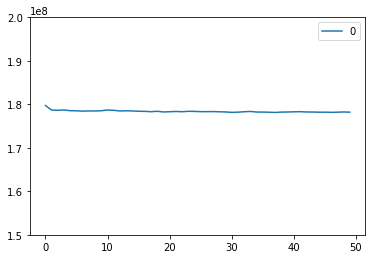

In [118]:
plt.ylim(1.5e8, 2e8)
sns.lineplot(data=pd.DataFrame(history.history['loss']))

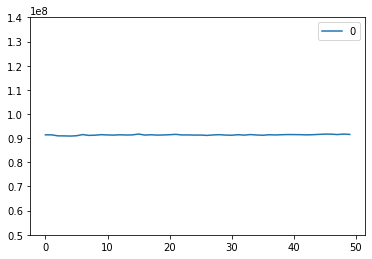

In [121]:
plt.ylim(5e7, 1.4e8)
sns.lineplot(data=pd.DataFrame(history.history['val_loss']))